In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline  

In [2]:
n_input = 784 # e.g. MNIST data input (img shape: 28*28)
n_hidden = 392 # hidden layer num units (e.g. half of input units)
n_classes  = 10 # e.g. MNIST total classes (0-9 digits)

# Learning Parameters
learning_rate    = 0.001
no_of_iterations = 40
batch_size       = 100

# tf Graph variables
x = tf.placeholder("float", [None, n_input], name='x')
y = tf.placeholder("float", [None, n_classes], name='y')

# Store layers weight & bias
stddev = 0.1 # <== This greatly affects accuracy!! 
weights = {
    'h_1': tf.Variable(tf.random_normal([n_input, n_hidden], stddev=stddev)),
    'h_2': tf.Variable(tf.random_normal([n_hidden, n_hidden], stddev=stddev)),
    'out': tf.Variable(tf.random_normal([n_hidden, n_classes], stddev=stddev))
}
biases = {
    'b_1': tf.Variable(tf.random_normal([n_hidden])),
    'b_2': tf.Variable(tf.random_normal([n_hidden])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

# Create model
hidden_layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['h_1']), biases['b_1']))
hidden_layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(hidden_layer_1, weights['h_2']), biases['b_2']))
pred = tf.sigmoid(tf.matmul(hidden_layer_2, weights['out']) + biases['out'])

# Define loss
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(pred, y)) # Softmax loss
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost) # Adam Optimizer
total_loss = np.zeros(no_of_iterations, dtype=np.float32)

# Initializing the variables
init = tf.initialize_all_variables()

# MNIST
mnist = input_data.read_data_sets('data/', one_hot=True)

correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))    
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

sess = tf.Session()
sess.run(init)
batch_num = int(mnist.train.num_examples / batch_size)


# Training cycle
for i in range(no_of_iterations):
    # Loop over all batches
    for j in range(batch_num):
        batch_elem, batch_label = mnist.train.next_batch(batch_size)
        # Fit training using batch data
        sess.run(optimizer, feed_dict={x: batch_elem, y: batch_label})
        total_loss[i] += sess.run(cost, feed_dict={x: batch_elem, y: batch_label})

    print ("Iteration No: %03d/%03d cost: %.3f" % (i, no_of_iterations, total_loss[i]))
    train_acc = sess.run(accuracy, feed_dict={x: batch_elem, y: batch_label})
    print ("Training accuracy: %.3f" % (train_acc))

print ("Optimization Finished!")

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
Iteration No: 000/040 cost: 896.710
Training accuracy: 0.950
Iteration No: 001/040 cost: 842.161
Training accuracy: 0.920
Iteration No: 002/040 cost: 832.262
Training accuracy: 0.970
Iteration No: 003/040 cost: 826.301
Training accuracy: 0.960
Iteration No: 004/040 cost: 822.038
Training accuracy: 0.990
Iteration No: 005/040 cost: 818.801
Training accuracy: 0.980
Iteration No: 006/040 cost: 816.374
Training accuracy: 0.990
Iteration No: 007/040 cost: 814.407
Training accuracy: 0.950
Iteration No: 008/040 cost: 812.858
Training accuracy: 0.990
Iteration No: 009/040 cost: 811.683
Training accuracy: 1.000
Iteration No: 010/040 cost: 810.623
Training accuracy: 0.970
Iteration No: 011/040 cost: 809.765
Training accuracy: 0.990
Iteration No: 012/040 cost: 809.056
Training accuracy: 1.000
Iteration No: 013/040 cost: 808.455
T

Test accuracy of NN with 2 hidden nodes: 0.982


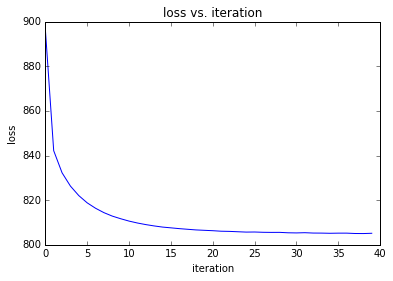

In [3]:
#plot chart
plt.figure(0)
plt.ylabel('loss')
plt.xlabel('iteration')
plt.title("loss vs. iteration")
plt.plot(total_loss)

test_acc = sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels})
print ("Test accuracy of NN with 2 hidden nodes: %.3f" % (test_acc))

In [4]:
sess.close()